# Regression using the CART Algorithm (a decision tree regressor) and the Mean Squared Error Splitting Criterion

| Key              | Value                                                                                                                                                                                                                                                                                                |
|:-----------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4106, BCM 3104, and BFS 4102                                                                                                                                                                                                                                                                     |
| **Course Names** | BBT 4106: Business Intelligence I (Week 10-12 of 13),<br/>BCM 3104: Business Intelligence and Data Analytics (Week 10-12 of 13) and<br/>BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13)                                                                                                  |
| **Semester**     | January to April 2026                                                                                                                                                                                                                                                                                |
| **Lecturer**     | Allan Omondi                                                                                                                                                                                                                                                                                         |
| **Contact**      | aomondi@strathmore.edu                                                                                                                                                                                                                                                                               |
| **Note**         | The lecture contains both theory and practice.<br/>This notebook forms part of the practice.<br/>It is intended for educational purpose only.<br/>Recommended citation: [BibTex](https://raw.githubusercontent.com/course-files/RegressionAndClassification/refs/heads/main/RecommendedCitation.bib) |


**Business context**: A restaurant called "Siwaka Dishes" has set a strategic objective *to optimize product profitability while maintaining customer satisfaction*. The business tracks two Key Performance Indicators (KPIs) from the financial perspective:

1. **Lagging KPI**: Monthly profit
2. **Leading KPI**: Percentage profit per unit

The business wants to leverage Machine Learning as part of AI to create a predictive model that can forecast the percentage profit per product for future sales. This will help in:
- Menu pricing optimization
- Inventory management
- Product mix decisions
- Cost control measures

The business would like the model to use the following historical data to predict the 'PercentageProfitPerUnit'
- `PaymentDate`
- `CustomerType`
- `BranchSubCounty`
- `ProductCategoryName`
- `QuantityOrdered`

**Dataset**: The **Siwaka Dishes profit per product** dataset is a synthetic (not real) dataset that contains 17,474 payments for orders that are in either of the following states:
- Processing
- In Transit
- Delivered

'Pending orders' and 'Canceled' orders are excluded from the dataset. The following table presents the chosen features and the target.

| **Type**                                | **Name**                  | **Description**                                                          |
|:----------------------------------------|---------------------------|:-------------------------------------------------------------------------|
| **Feature**                             | `PaymentDate`             | The date when the payment was made                                       |
| <span style="color:red">Excluded</span> | `OrderNumber`             | The unique Order Number that the payment was made for                    |
| **Feature**                             | `CustomerType`            | Either a business or an individual                                       |
| <span style="color:red">Excluded</span> | `CustomerName`            | The name of the customer who made the order                              |
| **Feature**                             | `BranchSubCounty`         | The Sub-County where the branch is located                               |
| <span style="color:red">Excluded</span> | `BranchCounty`            | The County where the branch is located                                   |
| <span style="color:red">Excluded</span> | `ProductName`             | The name of the product that was purchased                               |
| **Feature**                             | `ProductCategoryName`     | The category in which the product was grouped in                         |
| **Feature**                             | `QuantityOrdered`         | The number of products ordered                                           |
| <span style="color:red">Excluded</span> | `CostOfProductionPerUnit` | The cost of producing the product                                        |
| <span style="color:red">Excluded</span> | `SellingPricePerUnit`     | The price at which the product was sold to the client                    |
| <span style="color:red">Excluded</span> | `ProfitPerUnit`           | The amount of profit that the business made from the sale of the product |
| **Target**                              | `PercentageProfitPerUnit` | The amount of profit the business made expressed as a percentage         |

**Remote Environments:**

Do your best to setup your local environment as guided during the lab, however, if you have challenges setting it up, then you can use the following remote environments temporarily for the lab:<br/>

[![Colab](https://img.shields.io/badge/Open-Colab-orange?logo=googlecolab)](
https://colab.research.google.com/github/course-files/RegressionAndClassification/blob/main/1b_decision_tree.ipynb) (preferred option)

[![Codespaces](https://img.shields.io/badge/Open-Codespaces-blue?logo=github)](
https://github.com/codespaces/new/course-files/RegressionAndClassification) (alternative)


## Step 1: Import the necessary libraries

**Purpose**: This chunk imports all the necessary libraries for data analysis, machine learning, and visualization.

1. **For File and system operations [urllib3](https://urllib3.readthedocs.io/en/stable/)**
    - `urllib.request` is used for opening and downloading data from URLs.
    - `os` provides functions for interacting with the operating system, such as file and directory management.
    - The `import sys` statement allows access to Python's system-specific parameters and functions, such as command-line arguments and the interpreter environment.
    - `sys` is imported to check if the code is running in Google Colab or not, which can affect how files are downloaded or saved.

2. **For data manipulation - [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html) and [numpy](https://numpy.org/doc/stable/):**
    - `pandas as pd`: For loading the dataset, creating and managing DataFrames, data manipulation and analysis using DataFrames
    - `numpy as np`: For numerical operations and array manipulations

3. **For statistical data analysis - [scipy.stats](https://docs.scipy.org/doc/scipy/tutorial/stats.html)**
    - `kurtosis`: Measures the "tailedness" of data distribution
    - `skew`: Measures the asymmetry of data distribution

4. **For data preprocessing and transformation - [scikit-learn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)**
    - `LabelEncoder`: LabelEncoder from scikit-learn converts categorical text labels (e.g., cat, dog, mouse) into numerical values (e.g., 0, 1, 2). It is used to prepare categorical data for machine learning algorithms that require numeric inputs
    - `StandardScaler`: For scaling, centering and standardizing
    - `MinMaxScaler`: For normalizing
    - `PowerTransformer`: For applying the Box-Cox and Yeo-Johnson power transforms.

5. **For Machine Learning - [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html)**
    - `DecisionTreeClassifier`: A class from scikit-learn that implements the CART (Classification and Regression Trees) algorithm for building decision tree models.
    - `plot_tree`: A function from scikit-learn’s tree module that visualizes the decision tree structure.
    - `train_test_split`: A function from scikit-learn’s model_selection module that splits the dataset into training and testing sets.
    - `classification_report`: A function from scikit-learn’s metrics module used to evaluate the performance of the classifier. It gives detailed metrics such as precision, recall, f1-score, and support for each class.
    - `confusion_matrix`: A function from scikit-learn’s metrics module that computes the confusion matrix to evaluate the accuracy of a classification.
    - `GridSearchCV`: For hyperparameter tuning using cross-validation

6. **For data visualization - [matplotlib](https://matplotlib.org/stable/gallery/index.html) and [seaborn](https://seaborn.pydata.org/examples/index.html)**
    - `matplotlib.pyplot as plt`: For basic plotting functionality
    - `seaborn as sns`: For enhanced statistical visualizations

7. **For model persistence - [joblib](https://joblib.readthedocs.io/en/stable/)**
    - `joblib` is used for saving and loading Python objects, such as machine learning models, to and from disk.

8. **For suppressing warnings - [warnings](https://docs.python.org/3/library/warnings.html)**
    - `warnings`: Controls warning messages
    - `warnings.filterwarnings('ignore')`: Suppresses warning messages for cleaner output
    - Used to suppress warnings that may arise during the execution of the code. Even though it is not necessary for the code to run, it helps in keeping the output clean and focused on the results.

Confirm the following:
1. Which Python interpreter will be used to execute new code and where it is located
2. The Python version

Then install all the packages into the Jupyter notebook's virtual environment before importing them.

In [1]:
import sys
sys.executable

'c:\\Users\\aomondi\\Documents\\GitHub\\Teaching\\RegressionAndClassification\\.venv\\Scripts\\python.exe'

In [2]:
!python --version

Python 3.14.2


In [3]:
if "google.colab" in sys.modules:
    print("Installing in Google Colab")
    %pip install -r https://raw.githubusercontent.com/course-files/RegressionAndClassification/refs/heads/main/requirements/colab.txt
else:
    print("Installing in dev environment")
    %pip install -r https://raw.githubusercontent.com/course-files/RegressionAndClassification/refs/heads/main/requirements/dev.txt -c https://raw.githubusercontent.com/course-files/RegressionAndClassification/refs/heads/main/requirements/constraints.txt

Installing in dev environment
Note: you may need to restart the kernel to use updated packages.


In [4]:
# For file and system operations
import urllib.request
import os

# For data manipulation
import pandas as pd
import numpy as np

# For statistical data analysis
from scipy.stats import kurtosis
from scipy.stats import skew

# For data preprocessing and transformation
from sklearn.preprocessing import LabelEncoder

# For Machine Learning
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For model persistence
import joblib

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

**Purpose**: This chunk loads the dataset by checking if the dataset exists locally; if not, then it downloads it from the specified URL and saves it locally before loading it into a Pandas DataFrame.

- **Data Loading Parameters**
    - Uses `pd.read_csv()` with specific parameters:
        - `usecols`: Loads only the columns specified in `use_cols` for memory efficiency
        - `encoding='utf-8'`: Handles special characters in the dataset. This is suitable for most languages and special characters like ñ, €, ®. Other alternative encodings include:
        - `encoding='utf-16'`: Supports multilingual characters, uses 2 Bytes per character.
        - `encoding='utf-32'`: Like utf-16 but uses 4 Bytes per character, suitable for full Unicode range.
        - `encoding='latin-1'`: Handles Western European characters such as ñ, ß, € without throwing decode errors.
        - `encoding='big5'`: Traditional Chinese encoding used in Taiwan and Hong Kong.
        - `encoding='shift_jis'`: Japanese character encoding used on Windows.
        - You can try different encodings if you encounter the `UnicodeDecodeError` while reading a file. This is useful in cases where the business has branches across different countries and the dataset contains characters from multiple languages.
        - `nrows=200000`: Limits the number of rows loaded to 200,000. This can be reduced or increased based on the available memory and the size of the dataset.
    - The data is then stored in a `Pandas` DataFrame for further analysis
    - This selective loading approach helps manage memory usage and focuses the analysis on the relevant features for the design of the model.

In [5]:
dataset_path = './data/siwaka_dishes_view_profit_per_product.csv'
url = 'https://raw.githubusercontent.com/course-files/RegressionAndClassification/refs/heads/main/data/siwaka_dishes_view_profit_per_product.csv'

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    if not os.path.exists('./data'):
        os.makedirs('./data')
    urllib.request.urlretrieve(url, dataset_path)
    print("✅ Dataset downloaded")
else:
    print("✅ Dataset already exists locally")

# use_cols = ['PaymentDate', 'OrderNumber', 'CustomerType', 'CustomerName', 'BranchSubCounty', 'BranchCounty', 'ProductName', 'ProductCategoryName', 'QuantityOrdered', 'CostOfProductionPerUnit', 'SellingPricePerUnit', 'ProfitPerUnit', 'PercentageProfitPerUnit']
use_cols = ['PaymentDate', 'CustomerType', 'BranchSubCounty', 'ProductCategoryName', 'QuantityOrdered', 'PercentageProfitPerUnit']
profit_per_product = pd.read_csv(dataset_path, usecols=use_cols, encoding='utf-8', nrows=200000)

✅ Dataset already exists locally


### Assign correct data types to the columns

In [6]:
# Convert PaymentDate column to a datetime data type
profit_per_product['PaymentDate'] = pd.to_datetime(profit_per_product['PaymentDate'])

### Identify the numeric and categorical columns

**Selection of numeric columns**
- The code identifies columns with numeric data types (`int64` and `float64`) that can be subjected to mathematical or statistical functions.
- The code also identifies non-numeric columns (e.g., `strings`, `objects`, etc.) by excluding numeric (`int64`, `float64`) and `datetime` data types.
- This is done using `select_dtypes()` method of the DataFrame, which filters columns based on their data types.

In [7]:
numeric_cols = profit_per_product.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = profit_per_product.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns

print("\nThe identified numeric columns are:")
print(numeric_cols.tolist())

print("\nThe identified categorical columns are:")
print(categorical_cols.tolist())


The identified numeric columns are:
['QuantityOrdered', 'PercentageProfitPerUnit']

The identified categorical columns are:
['CustomerType', 'BranchSubCounty', 'ProductCategoryName']


## Step 3: Initial Exploratory Data Analysis (EDA)

In [9]:
print("\n*1* The number of observations and variables")
display(profit_per_product.shape)

print("\n*2* The data types:")
display(profit_per_product.info())

print("\n*3* The summary of the numeric columns:")
display(profit_per_product.describe())

print("\n*4* The whole dataset:")
display(profit_per_product)

print("\n*5* The first 5 rows in the dataset:")
display(profit_per_product.head())

print("\n*6* The last 5 rows in the dataset:")
display(profit_per_product.tail())

print("\n*7* Percentage distribution for each category")
print("\nNumber of observations per class:")
print("Frequency counts:\n", profit_per_product['BranchSubCounty'].value_counts())
print("\nPercentages:\n", profit_per_product['BranchSubCounty'].value_counts(normalize=True) * 100, "%")


*1* The number of observations and variables


(17474, 6)


*2* The data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17474 entries, 0 to 17473
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PaymentDate              17474 non-null  datetime64[ns]
 1   CustomerType             17474 non-null  object        
 2   BranchSubCounty          17474 non-null  object        
 3   ProductCategoryName      17474 non-null  object        
 4   QuantityOrdered          17474 non-null  int64         
 5   PercentageProfitPerUnit  17474 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 819.2+ KB


None


*3* The summary of the numeric columns:


,PaymentDate,QuantityOrdered,PercentageProfitPerUnit
count,17474,17474.000000,17474.000000
mean,2024-04-17 08:24:35.105871360,4.493075,126.954075
min,2021-01-10 00:00:00,1.000000,75.000000
25%,2023-09-14 00:00:00,2.000000,100.000000
50%,2024-07-29 00:00:00,4.000000,114.290000
75%,2025-02-10 00:00:00,6.000000,133.330000
max,2025-05-30 00:00:00,8.000000,300.000000
std,NaN,2.294737,44.015305



*4* The whole dataset:


,PaymentDate,CustomerType,BranchSubCounty,ProductCategoryName,QuantityOrdered,PercentageProfitPerUnit
0,2021-01-10,Business,Makadara,Soup/Stew Dishes,2,133.33
1,2021-01-10,Business,Makadara,Sweet Snacks/Desserts,4,150.00
2,2021-01-10,Business,Makadara,Meat-Based Dishes,1,100.00
3,2021-01-17,Business,Kamukunji,Legume-Based Dishes,1,100.00
4,2021-01-17,Business,Kamukunji,African Cultural Specials,6,133.33
...,...,...,...,...,...,...
17469,2025-05-30,Business,Westlands,Soup/Stew Dishes,5,133.33
17470,2025-05-30,Business,Westlands,Combination Plates,3,100.00
17471,2025-05-30,Business,Ruaraka,Fish Dishes,4,133.33
17472,2025-05-30,Business,Ruaraka,Sweet Snacks/Desserts,4,300.00



*5* The first 5 rows in the dataset:


,PaymentDate,CustomerType,BranchSubCounty,ProductCategoryName,QuantityOrdered,PercentageProfitPerUnit
0,2021-01-10,Business,Makadara,Soup/Stew Dishes,2,133.33
1,2021-01-10,Business,Makadara,Sweet Snacks/Desserts,4,150.00
2,2021-01-10,Business,Makadara,Meat-Based Dishes,1,100.00
3,2021-01-17,Business,Kamukunji,Legume-Based Dishes,1,100.00
4,2021-01-17,Business,Kamukunji,African Cultural Specials,6,133.33



*6* The last 5 rows in the dataset:


,PaymentDate,CustomerType,BranchSubCounty,ProductCategoryName,QuantityOrdered,PercentageProfitPerUnit
17469,2025-05-30,Business,Westlands,Soup/Stew Dishes,5,133.33
17470,2025-05-30,Business,Westlands,Combination Plates,3,100.00
17471,2025-05-30,Business,Ruaraka,Fish Dishes,4,133.33
17472,2025-05-30,Business,Ruaraka,Sweet Snacks/Desserts,4,300.00
17473,2025-05-30,Business,Ruaraka,Vegetable-Based Dishes,6,100.00



*7* Percentage distribution for each category

Number of observations per class:
Frequency counts:
 BranchSubCounty
Mathare             1105
Kibra                962
Roy Sambu            961
Kasarani             927
Kamukunji            923
Embakasi             920
Kangemi              890
Kisumu Central       890
Langata              883
Makadara             876
Dagoretti            875
Westlands            861
Nyali                849
Nakuru Town East     845
Kesses               826
Nyeri Central        817
Starehe              793
Kilimani             771
Githurai             763
Ruaraka              737
Name: count, dtype: int64

Percentages:
 BranchSubCounty
Mathare             6.323681
Kibra               5.505322
Roy Sambu           5.499599
Kasarani            5.305025
Kamukunji           5.282133
Embakasi            5.264965
Kangemi             5.093281
Kisumu Central      5.093281
Langata             5.053222
Makadara            5.013162
Dagoretti           5.007440
Westlan

### Measures of Distribution

#### Variance of numeric columns

In [10]:
print("\nVariance of the numeric columns:")
print(profit_per_product[numeric_cols].var())


Variance of the numeric columns:
QuantityOrdered               5.265819
PercentageProfitPerUnit    1937.347062
dtype: float64


#### Standard deviation of numeric columns

In [11]:
print("\nStandard deviation of the numeric columns:")
print(profit_per_product[numeric_cols].std())


Standard deviation of the numeric columns:
QuantityOrdered             2.294737
PercentageProfitPerUnit    44.015305
dtype: float64


#### Kurtosis (Pearson) of numeric columns

The Kurtosis informs us of how often outliers occur in the results. There are different formulas for calculating kurtosis. Specifying `fisher=False` allows us to use the same kurtosis formula used in other statistical software like SPSS and SAS. It is referred to as "Pearson's definition of kurtosis".

Interpretation of Pearson's definition of kurtosis:

1. Kurtosis < 3 implies a low number of outliers → platykurtic
2. Kurtosis = 3 implies a medium number of outliers → mesokurtic
3. Kurtosis > 3 implies a high number of outliers → leptokurtic

High kurtosis (leptokurtic) affects models that are sensitive to outliers. Estimates of the variance are also inflated. Low kurtosis (platykurtic) implies a possible underestimation of real-world variability. The typical remedy includes trimming outliers or using robust statistical methods that are less affected by outliers.

In [12]:
print(profit_per_product[numeric_cols].apply(lambda x: kurtosis(x, fisher=False)))

QuantityOrdered            1.762874
PercentageProfitPerUnit    9.882342
dtype: float64


#### Skewness of numeric columns

The skewness is used to identify the asymmetry of the distribution of results. Similar to kurtosis, there are several ways of computing the skewness.

The skewness test results are interpreted as:

1. Skewness between -0.4 and 0.4 (inclusive) implies that there is no skew in the distribution of results; the distribution of results is symmetrical; it is a normal distribution; a Gaussian distribution.
2. Skewness above 0.4 implies a positive skew; a right-skewed distribution.
3. Skewness below -0.4 implies a negative skew; a left-skewed distribution.

Skewed data results in misleading averages and potentially biased model coefficients. The typical remedy to skewed data involves applying data transformations such as logarithmic, square-root, or Box–Cox, etc. to reduce skewness.

In [13]:
print(profit_per_product[numeric_cols].apply(lambda x: skew(x, bias=False)))

QuantityOrdered            0.006793
PercentageProfitPerUnit    2.497633
dtype: float64


### Measures of Relationship

#### Covariance matrix of numeric features

Covariance is a statistical measure that indicates the direction of the linear relationship between two variables. It assesses whether increases in one variable correspond to increases or decreases in another.​

1. Positive Covariance: When one variable increases, the other tends to increase as well.
2. Negative Covariance: When one variable increases, the other tends to decrease.
3. Zero Covariance: No linear relationship exists between the variables.

While covariance indicates the direction of a relationship, it does not convey the strength or consistency of the relationship. The correlation coefficient is used to indicate the strength of the relationship.

In [14]:
display(profit_per_product[numeric_cols].cov())

,QuantityOrdered,PercentageProfitPerUnit
QuantityOrdered,5.265819,0.116239
PercentageProfitPerUnit,0.116239,1937.347062


#### Correlation matrix of numeric features
A strong correlation between variables enables us to better predict the value of the dependent variable using the value of the independent variable. However, a weak correlation between two variables does not help us to predict the value of the dependent variable from the value of the independent variable. This is useful only if there is a linear association between the variables.

We can measure the statistical significance of the correlation using Spearman's rank correlation rho. This shows us if the variables are significantly monotonically related. A monotonic relationship between two variables implies that as one variable increases, the other variable either consistently increases or consistently decreases. The key characteristic is the preservation of the direction of change, though the rate of change may vary.

Values range from -1 to +1. Interpretation:
* +1 indicates perfect positive correlation
* -1 indicates perfect negative correlation
* 0 indicates no correlation

In [15]:
spearman_corr = profit_per_product[numeric_cols].corr(method='spearman')
display(spearman_corr)

,QuantityOrdered,PercentageProfitPerUnit
QuantityOrdered,1.0000,-0.0155
PercentageProfitPerUnit,-0.0155,1.0000


### Basic visualization of the data

- `n_cols = 3` Sets the number of plots per row to 3
- `n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)` Calculates the number of rows needed based on the number of numeric columns and the number of columns per row.
- `plt.figure(figsize=(12, 5 * n_rows))` Sets the figure size to be wider and taller based on the number of rows.
- `for i, col in enumerate(numeric_cols, 1):` Iterates over each numeric column (`numeric_cols`), starting the index at 1. `enumerate(numeric_cols, 1)` returns pairs of (index, value) for each item in the list. The 1 means that the index will start from 1, e.g., (1, 'Days for shipping (real)'), (2, 'Days for shipment (scheduled)'), etc.
- `plt.subplot(n_rows, n_cols, i)` Creates a subplot in a grid layout with `n_rows` rows and `n_cols` columns, placing the current plot in the `i`-th position.
- `sns.histplot(data=profit_per_product, x=col)` Plots a histogram for the current numeric column using Seaborn's `histplot` function.
- `sns.boxplot(data=profit_per_product, y=col)` Plots a box plot for the current numeric column using Seaborn's `boxplot` function.
- `sns.despine(right=True, top=True)` Removes the right and top spines (borders) of the plot for a cleaner look.
- `plt.title(f'Distribution of {col}')` Sets the title of the current subplot to indicate which column's distribution is being shown.
- `plt.grid(axis='y', alpha=0.2)` Adds a grid to the y-axis with a transparency level of 0.2 for better visibility.
- `plt.grid(axis='x', visible=False)` Hides the grid for the x-axis to reduce clutter and increase the data-to-ink ratio.
- `plt.tight_layout()` Adjusts the spacing between subplots to prevent overlap and ensure a clean layout.
- `plt.show()` Displays the entire figure with all subplots.

#### Histograms

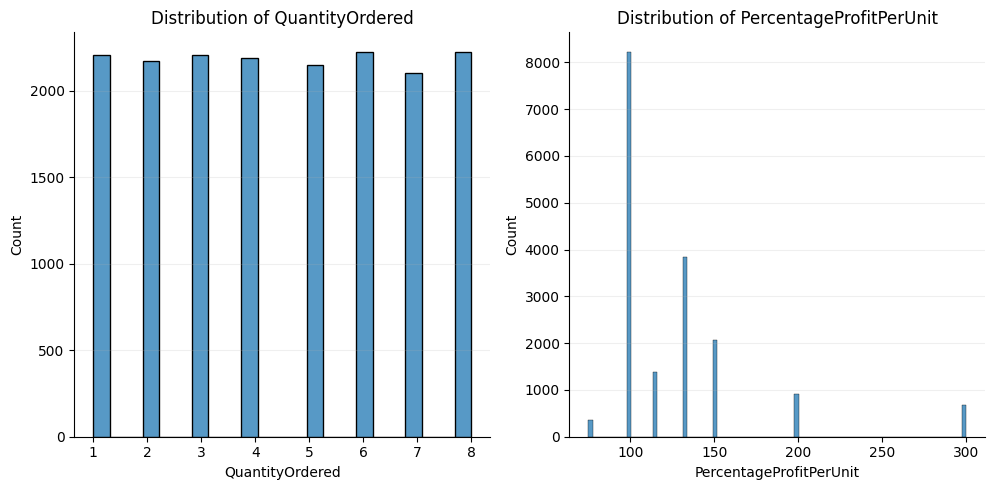

In [16]:
n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=profit_per_product, x=col)
    sns.despine(right=True, top=True)
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y', alpha=0.2)
    plt.grid(axis='x', visible=False)
plt.tight_layout()  # Adjust spacing
plt.show()

#### Box plots

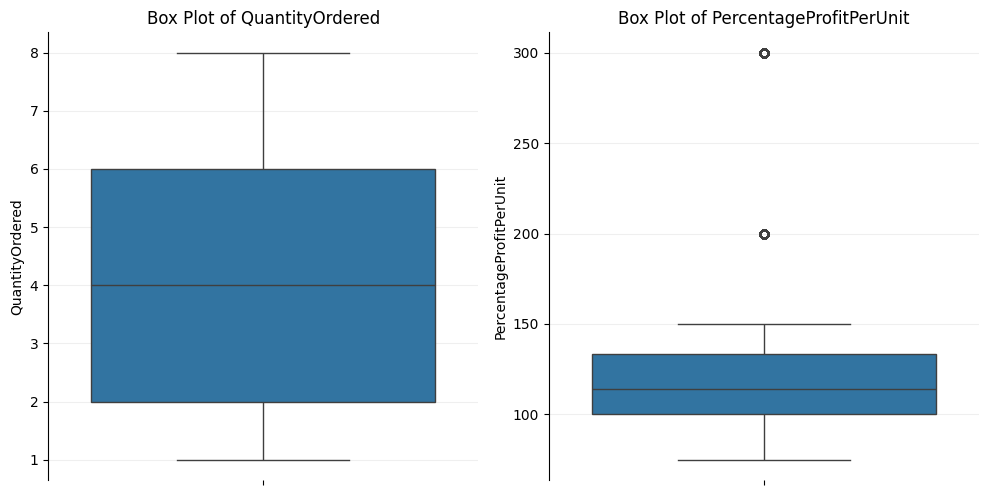

In [17]:
n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=profit_per_product, y=col)
    sns.despine(right=True, top=True, bottom=True)
    plt.title(f'Box Plot of {col}')
    plt.grid(axis='y', alpha=0.2)
    plt.grid(axis='x', visible=False)
plt.tight_layout()
plt.show()

#### Missing data plot

- This visualization helps to quickly identify which columns have missing values and the extent of the missing data. The heatmap will show yellow for missing values and purple for present values, making it easy to spot patterns of missingness. This is useful for understanding the completeness of the dataset and deciding how to handle missing values in subsequent analysis.
- The code uses `Seaborn`'s `heatmap()` function to visualize missing data in the DataFrame.
- The code also uses the `isnull()` method to create a boolean DataFrame indicating where values are missing (True) or present (False).
- `yticklabels=False` hides the y-axis labels to reduce clutter and increase the data-to-ink ratio.
- `cbar=False` removes the color bar, which is not necessary for this plot.
- `cmap='viridis'` sets the color map to 'viridis' which is a perceptually uniform color map suitable for visualizing missing data; yellow represents missing values, while purple represents present values.
- `plt.title('Missing Data')` sets the title of the plot to 'Missing Data'
- `plt.show()` displays the plot.

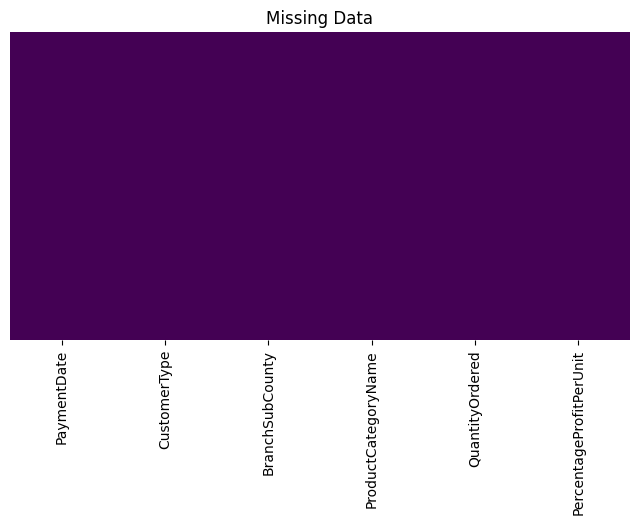

In [18]:
plt.figure(figsize=(8, 4))
sns.heatmap(profit_per_product.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

#### Correlation heatmap

- This visualization helps to quickly identify relationships between numeric features. The heatmap will show the strength and direction of correlations, with colors indicating positive (red) or negative (blue) correlations. This is useful for understanding how features relate to each other and can inform feature selection or feature engineering in subsequent analysis.
- The code uses `Searborn`'s `heatmap()` function to visualize the Spearman correlation matrix of the numeric features in the DataFrame.
- `annot=True` adds the correlation values as annotations on the heatmap.
- `cmap='coolwarm'` sets the color map to 'coolwarm' which provides a gradient from blue (negative correlation) to red (positive correlation).
- `center=0` centers the color map at 0, which is useful for visualizing both positive and negative correlations.

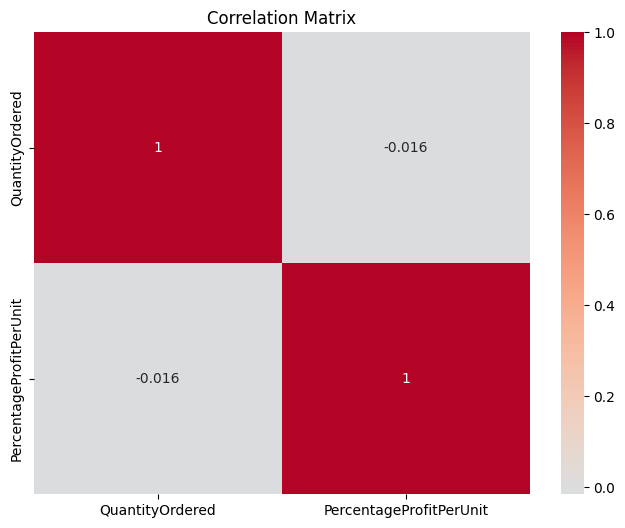

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Scatter plot matrix

- This visualization helps to quickly identify relationships between pairs of numeric features. The scatter plot matrix will show scatter plots for each pair of numeric features, allowing for visual inspection of relationships, trends, and potential outliers. This is useful for understanding how features interact with each other and can inform feature selection or feature engineering in subsequent analysis.
- The code uses `Seaborn`'s `pairplot()` function to create a scatter plot matrix of the numeric features in the DataFrame
- `plt.suptitle('Scatter Plot Matrix', y=1.02)` Adds a centered title above all subplots (or the single plot). `y=1.02` Moves the title upward by 2% of the figure height (default is y=1.0). This is done to prevent overlap in the subplot titles.

<Figure size 1000x1000 with 0 Axes>

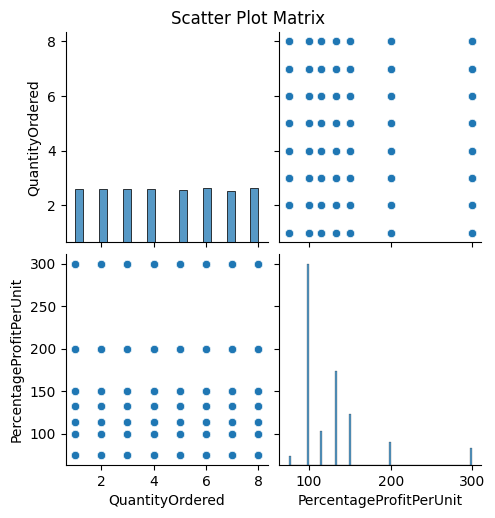

In [20]:
plt.figure(figsize=(10, 10))
sns.pairplot(profit_per_product[numeric_cols])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

## Step 4: Data preprocessing and transformation

- Decision trees can handle features that are in different units (e.g., age [0–100] vs. income [0–1,000,000]), therefore, there is no significant need to perform data transformations such as standardization (setting the mean = 0 and standard deviation = 1) using `StandardScaler()` or normalization (setting the minimum value = 0 and the maximum value = 1) using `MinMaxScaler()`

### Filter out the features that are not needed for the design of the model

In [21]:
selected_cols = ['CustomerType', 'BranchSubCounty', 'ProductCategoryName', 'QuantityOrdered', 'PaymentDate', 'PercentageProfitPerUnit']
profit_per_product = profit_per_product[selected_cols].copy()
print('The columns in the dataset after filtering out the columns that are not needed for the design of the model:')
profit_per_product.head()

The columns in the dataset after filtering out the columns that are not needed for the design of the model:


,CustomerType,BranchSubCounty,ProductCategoryName,QuantityOrdered,PaymentDate,PercentageProfitPerUnit
0,Business,Makadara,Soup/Stew Dishes,2,2021-01-10,133.33
1,Business,Makadara,Sweet Snacks/Desserts,4,2021-01-10,150.00
2,Business,Makadara,Meat-Based Dishes,1,2021-01-10,100.00
3,Business,Kamukunji,Legume-Based Dishes,1,2021-01-17,100.00
4,Business,Kamukunji,African Cultural Specials,6,2021-01-17,133.33


### Represent the non-numeric, categorical columns as numeric using label encoding

- `profit_per_product_encoded = profit_per_product.copy()`: Preserves original data integrity while creating a modified version for encoding.
- `label_encoders = {}`: Creates a dictionary to store the label encoder that was used for each column

- `for col in categorical_cols:` For each categorical column:
    - `label_encoders[col] = LabelEncoder()`: Creates a LabelEncoder instance
    - `profit_per_product_encoded[col] = label_encoders[col].fit_transform(profit_per_product[col])`: Replaces text values with numeric codes (e.g., "Electronics" → 0, "Furniture" → 1)

- `profit_per_product_encoded.head()` and `profit_per_product_encoded.info()`: Used to confirm that the non-numeric columns are now numeric

In [22]:
profit_per_product_encoded = profit_per_product.copy()

# Create a dictionary to store the label encoders for each column
label_encoders = {}

# Encode all categorical columns
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    profit_per_product_encoded[col] = label_encoders[col].fit_transform(profit_per_product[col])

In [23]:
profit_per_product_encoded.head()

,CustomerType,BranchSubCounty,ProductCategoryName,QuantityOrdered,PaymentDate,PercentageProfitPerUnit
0,0,11,7,2,2021-01-10,133.33
1,0,11,9,4,2021-01-10,150.00
2,0,11,5,1,2021-01-10,100.00
3,0,3,4,1,2021-01-17,100.00
4,0,3,0,6,2021-01-17,133.33


In [24]:
profit_per_product_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17474 entries, 0 to 17473
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CustomerType             17474 non-null  int64         
 1   BranchSubCounty          17474 non-null  int64         
 2   ProductCategoryName      17474 non-null  int64         
 3   QuantityOrdered          17474 non-null  int64         
 4   PaymentDate              17474 non-null  datetime64[ns]
 5   PercentageProfitPerUnit  17474 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 819.2 KB


### Feature engineering

- Decision tree models (both classifiers and regressors) expect numeric data.
- The `datetime64` must be converted to a numeric data type such as `int64`. This is done for each section of the date so that the numeric values are made up of `year`, `month`, `day`, and `dayofweek`.
- Although `datetime64` data types are not directly usable by decision trees, **feature engineering** can be performed by extracting relevant temporal components such as
   - year
   - month
   - day
   - dayofweek
   - hour, minute, second (if relevant)
   - Elapsed time (e.g., timestamp converted to int64)

- These extracted features are numerical and can then be used as input to the model.

In [25]:
# First, identify datetime columns
datetime_columns = profit_per_product_encoded.select_dtypes(include=['datetime64']).columns

# Convert datetime to numeric features
for col in datetime_columns:
    profit_per_product_encoded[f'{col}_year'] = profit_per_product_encoded[col].dt.year
    profit_per_product_encoded[f'{col}_month'] = profit_per_product_encoded[col].dt.month
    profit_per_product_encoded[f'{col}_day'] = profit_per_product_encoded[col].dt.day
    profit_per_product_encoded[f'{col}_dayofweek'] = profit_per_product_encoded[col].dt.dayofweek

# Drop original datetime columns
profit_per_product_encoded = profit_per_product_encoded.drop(columns=datetime_columns)

# Confirm the feature engineering
profit_per_product_encoded.head(15)

,CustomerType,BranchSubCounty,ProductCategoryName,QuantityOrdered,PercentageProfitPerUnit,PaymentDate_year,PaymentDate_month,PaymentDate_day,PaymentDate_dayofweek
0,0,11,7,2,133.33,2021,1,10,6
1,0,11,9,4,150.00,2021,1,10,6
2,0,11,5,1,100.00,2021,1,10,6
3,0,3,4,1,100.00,2021,1,17,6
4,0,3,0,6,133.33,2021,1,17,6
5,0,16,4,1,100.00,2021,2,5,4
6,0,16,5,7,100.00,2021,2,5,4
7,0,16,4,6,100.00,2021,2,5,4
8,1,7,7,6,114.29,2021,2,18,3
9,1,7,1,1,100.00,2021,2,18,3


### Create X and y datasets for the features and target variable respectively

- `X = ...`: Separates the data such that the *DataFrame* called `X` contains only the features (independent variables or predictors)
    - `axis=0` drops the concerned rows.
    - `axis=1` drops the concerned columns.

- `y = ...`: Separates the data such that the *Series* called `y` contains only the target (dependent variable or outcome)

In [26]:
X = profit_per_product_encoded.drop(['PercentageProfitPerUnit'], axis=1)
y = profit_per_product_encoded['PercentageProfitPerUnit']

print("\nThe number of observations and variables in the features dataset")
print(X.shape)
print("\nThe columns in the features dataset")
print(X.columns)

print("\nThe number of observations and variables in the target dataset")
print(y.shape)


The number of observations and variables in the features dataset
(17474, 8)

The columns in the features dataset
Index(['CustomerType', 'BranchSubCounty', 'ProductCategoryName',
       'QuantityOrdered', 'PaymentDate_year', 'PaymentDate_month',
       'PaymentDate_day', 'PaymentDate_dayofweek'],
      dtype='object')

The number of observations and variables in the target dataset
(17474,)


### Train‑test split

- This step splits the dataset into training and testing sets to evaluate the model's performance on unseen data. The `train_test_split()` function is used to randomly split the data, ensuring that the target variable's distribution is preserved in both sets.
- `stratify=y` in train_test_split ensures that the train and test sets have the same proportion of each class label as the original dataset. This is important for classification tasks, especially when classes are imbalanced, as it preserves the class distribution in both splits.
- `test_size=0.3` indicates that 30% of the data will be used for testing, while 70% will be used for training.
- `random_state=53` ensures reproducibility of the split, meaning that every time you run the code, you will get the same split of data.
- `StandardScaler()` is used to standardize the features by setting mean = 0 and variance = 1. This is important for kNN, as it is sensitive to the scale of the features. Standardization ensures that all features contribute equally to the distance calculations.
- `fit_transform()` is applied to the training data to compute the mean and standard deviation, and then transform the data accordingly.
- `transform()` is applied to the test data using the same scaler fitted on the training data. This ensures that the test data is scaled in the same way as the training data, preventing data leakage.

- The `train_test_split` function returns four objects:
  - `X_train`: features for training
  - `X_test`: features for testing
  - `y_train`: labels for training
  - `y_test`: labels for testing

**Why:** Splitting the data this way allows you to train your model on one part of the data and evaluate its performance on unseen data, which helps prevent overfitting and gives an objective measure of the model's accuracy.

*Analogy:* This is similar to how a student learning a subject is not exposed to only one past paper that they can memorize. If they memorize the past paper and the exam assesses them on a different set of questions, then their performance in the exam will not be the same as their performance in the memorized past paper.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=53, stratify=y)

 ## Step 5: Design a baseline decision tree model

- This step creates a baseline decision tree regressor model using the `DecisionTreeRegressor` class from scikit-learn.
- The algorithm uses the training data (`X_train` and `y_train`) to learn the mapping between the features and the target variable. This mapping is what is represented as the **model**.
- The model is then used to make predictions on the test data (`X_test`).
- The performance of the model is evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).
- MAE measures the average absolute difference between predicted and actual values. MAE represents the average size of the prediction error. It gives a sense of how much, on average, predictions deviate from actual values
- MSE measures the average squared difference between predicted and actual values.
- RMSE is the square root of MSE, providing an error metric in the same units as the target variable.
- R² indicates the proportion of variance in the target variable that is explained by the model, with values closer to 1 indicating a better fit.

---
- **R²** (also called the **coefficient of determination**), measures how well the model explains the variance in the target variable.
- It ranges typically from 0 to 1, where:
  - R² = 1: Perfect prediction
  - R² = 0: The model's predictions are similar to predicting the mean (similar to guessing)
  - R²<0: The model's predictions are worse than predicting the mean (worse than guessing)

In [28]:
decisiontree_regressor_baseline = DecisionTreeRegressor(random_state=53)
decisiontree_regressor_baseline.fit(X_train, y_train)

y_pred = decisiontree_regressor_baseline.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print('The baseline decision tree model\'s performance metrics:\n')
print(f'MAE : {mae:,.2f}')
print(f'MSE : {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²  : {r2:.4f}')

The baseline decision tree model's performance metrics:

MAE : 18.74
MSE : 1,395.13
RMSE: 37.35
R²  : 0.2809


## Step 6: Perform hyperparameter tuning

- **Hyperparameter tuning** focuses on hyperparameters which are external configurations of a model that cannot be learned from the data and must be set before training.
- Examples of hyperparameters include the maximum depth of a decision tree, the minimum number of samples in the leaf node of a decision tree, “k” in kNN, and “k” in k Means Clustering, etc.
- Parameter tuning focuses on parameters which are internal to the model and are learned from the data, e.g., coefficients in linear regression or logistic regression and weights in neural networks
- The `GridSearchCV` function in Python (from the `sklearn.model_selection` module) is used to systematically search for the best combination of hyperparameters for a given machine learning model, by performing cross-validation.
  - `param_grid`: This is a dictionary that defines the **grid** of hyperparameters to search. For example, different values for `max_depth`, `min_samples_split`, etc.
  - `cv=5`: This applies 5-fold cross-validation such that the data is split into 5 subsets. Each subset gets a turn as a validation set while the others are used for training.
  - `n_jobs`: Tells the grid search to use all available CPU cores to parallelize the computation. Thus speeding up the search.
  - `verbose=1`: Displays progress messages during the search. Helps track the process while running.
  - There are various `scoring` options to choose from, e.g.:
    - 'neg_mean_squared_error': Negative mean squared error (for regression)
    - 'neg_root_mean_squared_error': Negative root mean squared error (for regression)
    - 'neg_mean_absolute_error': Negative mean absolute error (for regression)
    - 'r2': R-squared (for regression)
    - 'accuracy': Classification accuracy
    - 'precision', 'recall', 'f1': Precision, recall, F1-score (for classification)
    - 'roc_auc': Area under the ROC curve (for binary classification)
    - 'neg_log_loss': Negative log loss (for classification)

In [29]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

grid = GridSearchCV(
    decisiontree_regressor_baseline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print('Best parameter values after hyperparameter tuning:', grid.best_params_)
decisiontree_regressor_optimum = grid.best_estimator_

y_pred_best = decisiontree_regressor_optimum.predict(X_test)
mae_best  = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best   = r2_score(y_test, y_pred_best)

print(f'Optimised MAE : {mae_best:,.2f}')
print(f'Optimised MSE: {rmse_best:,.2f}')
print(f'Optimised RMSE: {rmse_best:,.2f}')
print(f'Optimised R²  : {r2_best:.4f}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameter values after hyperparameter tuning: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimised MAE : 18.15
Optimised MSE: 28.99
Optimised RMSE: 28.99
Optimised R²  : 0.5668


## Step 7: Display the feature importance

- `important_features = pd.Series(decisiontree_regressor_optimum.feature_importances_, index=X.columns)`
    - Creates a pandas Series containing feature importance scores
    - `feature_importances_` is an attribute of the trained decision tree model that shows how much each feature contributed to predictions
    - `index=X.columns` labels each importance score with its corresponding feature name

- `top10_important_features = important_features.sort_values(ascending=False).head(10)`
    - Sorts the importance scores in descending order (most important first)
    - `.head(10)` selects only the top 10 most important features

- `top10_important_features.plot(kind='barh')`
    - Creates a horizontal bar chart (`'barh'`) of the importance measure of the features


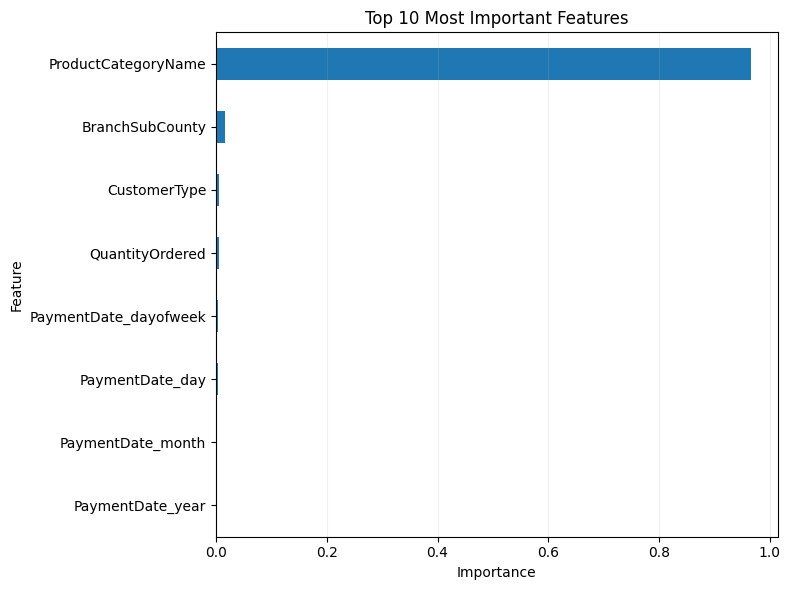

In [30]:
important_features = pd.Series(decisiontree_regressor_optimum.feature_importances_, index=X.columns)
top10_important_features = important_features.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top10_important_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.2)
plt.grid(axis='y', visible=False)
plt.tight_layout()
plt.show()

## Step 8: Visualize the decision tree

Visualizing the entire tree can be challenging when it is deep. For illustrative purposes, we can restrict it to a shallower depth using `max_depth=3`.

`plt.figure(figsize=(15, 10))`
- This creates a new matplotlib figure with a size of 12 inches by 8 inches to ensure that the decision tree plot is large and readable.

plot_tree(decisiontree_regressor_optimum,
          feature_names=profit_per_product_encoded.columns,
          max_depth=3,
          filled=True,
          fontsize=8)

`plot_tree(...)`
- Plots the trained decision tree (`decisiontree_regressor_optimum`).
    - `feature_names=profit_per_product_encoded.columns`: Labels the tree’s nodes with the feature names.
    - `filled=True`: Colors the nodes based on the class for better visualization.
    - `fontsize=8`: Sets the font size for the text in the plot to 8 for better readability.
    - `max_depth=3`: Limits the depth of the tree to 3 levels for better readability.
- This visually shows how the decision tree splits the data and makes decisions.

`plt.title("Decision Tree using the Mean Squared Error (MSE) Splitting Criterion")`
- Sets the title of the plot to provide context for the visualization.

`plt.show()`
- This is used to display the plot in the notebook.

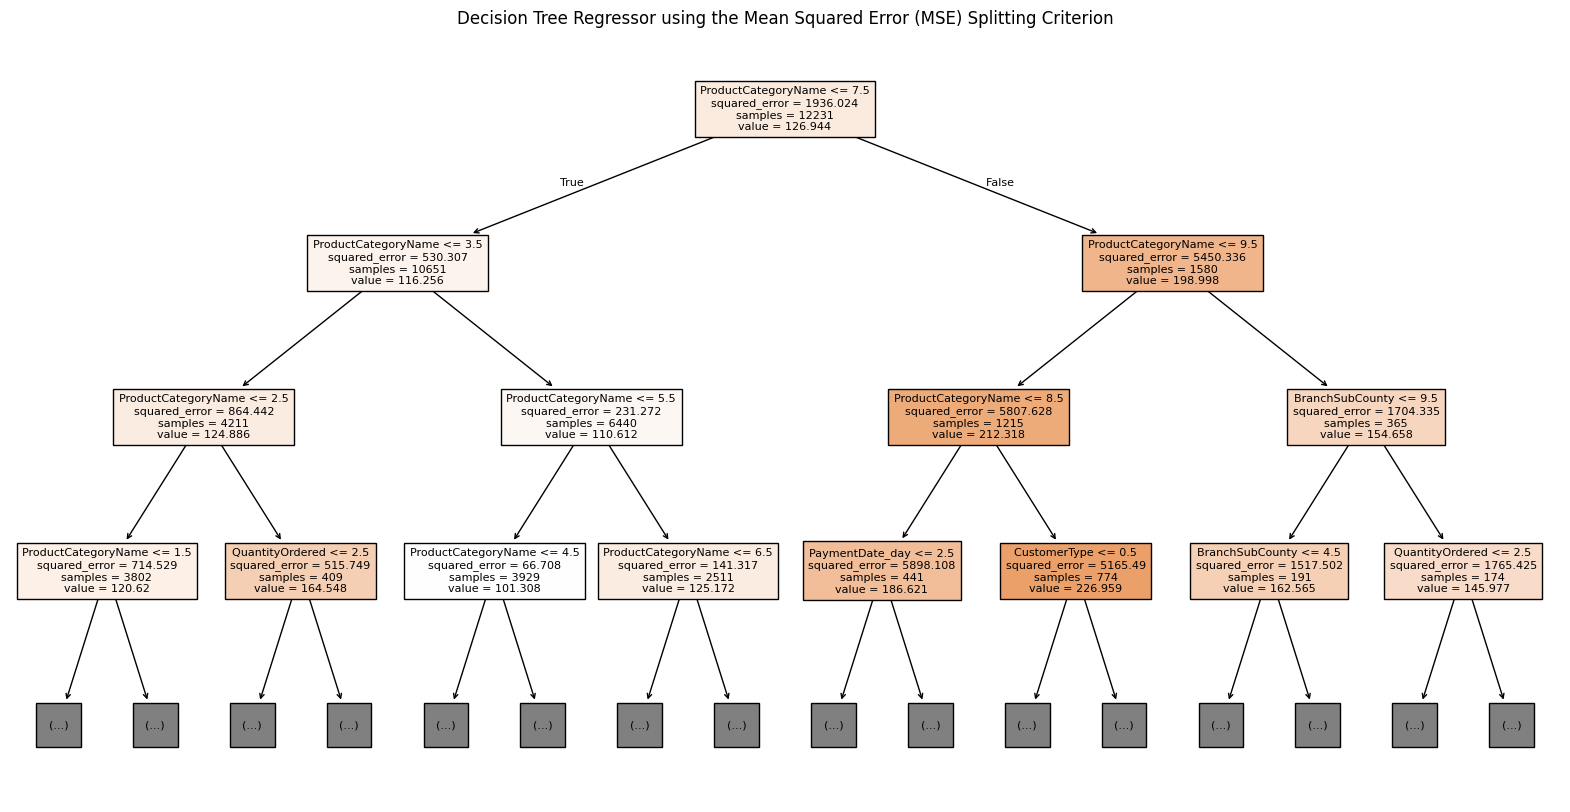

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(decisiontree_regressor_optimum,
          feature_names=profit_per_product_encoded.columns,
          filled=True,
          fontsize=8,
          max_depth=3)
plt.title("Decision Tree Regressor using the Mean Squared Error (MSE) Splitting Criterion")
plt.show()

## Step 9: Make predictions on new data and save the results for reporting in Power BI

### Predictions using new data provided in a DataFrame

In [32]:
# Create a DataFrame with new customer data (replace values as needed)
new_data = pd.DataFrame({
    'PaymentDate': ['11-07-25', '15-08-25'],
    'CustomerType': ['Business', 'Individual'],
    'BranchSubCounty': ['Kilimani', 'Langata'],
    'ProductCategoryName': ['Meat-Based Dishes', 'Fried Dishes'],
    'QuantityOrdered': [8, 4]
})

# Create a copy of the data for encoding
new_data_encoded = new_data.copy()

# Convert PaymentDate column to datetime
new_data_encoded['PaymentDate'] = pd.to_datetime(new_data_encoded['PaymentDate'])

# Identify all datetime columns
datetime_columns = new_data_encoded.select_dtypes(include=['datetime64']).columns

categorical_cols = new_data_encoded.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns

# Use transform() instead of fit_transform() since the encoder is already fitted
# Only transform new data using the fitted encoders
for col in categorical_cols:
    if col in new_data_encoded.columns:
        new_data_encoded[col] = label_encoders[col].transform(new_data_encoded[col])

# Convert datetime to numeric features
for col in datetime_columns:
    new_data_encoded[f'{col}_year'] = new_data_encoded[col].dt.year
    new_data_encoded[f'{col}_month'] = new_data_encoded[col].dt.month
    new_data_encoded[f'{col}_day'] = new_data_encoded[col].dt.day
    new_data_encoded[f'{col}_dayofweek'] = new_data_encoded[col].dt.dayofweek

# Drop original datetime columns
new_data_encoded = new_data_encoded.drop(columns=datetime_columns)

# Make predictions
predictions = decisiontree_regressor_optimum.predict(new_data_encoded)

# Add predictions as a new column
new_data['Predicted_PercentageProfitPerUnit'] = predictions

display(new_data)

,PaymentDate,CustomerType,BranchSubCounty,ProductCategoryName,QuantityOrdered,Predicted_PercentageProfitPerUnit
0,11-07-25,Business,Kilimani,Meat-Based Dishes,8,100.098124
1,15-08-25,Individual,Langata,Fried Dishes,4,163.944223


### Predictions using new data provided in a CSV file

In [33]:
dataset_path = './data/siwaka_dishes_view_profit_per_product_new_data.csv'
url = 'https://github.com/course-files/RegressionAndClassification/raw/refs/heads/main/data/siwaka_dishes_view_profit_per_product_new_data.csv'

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    if not os.path.exists('./data'):
        os.makedirs('./data')
    urllib.request.urlretrieve(url, dataset_path)
    print("✅ Dataset downloaded")
else:
    print("✅ Dataset already exists locally")

use_cols = ['PaymentDate', 'OrderNumber', 'CustomerType', 'CustomerName', 'BranchSubCounty', 'BranchCounty', 'ProductName', 'ProductCategoryName', 'QuantityOrdered', 'CostOfProductionPerUnit', 'SellingPricePerUnit', 'ProfitPerUnit', 'PercentageProfitPerUnit']
new_data = pd.read_csv(dataset_path, usecols=use_cols, encoding='utf-8', nrows=200000)

selected_cols = ['PaymentDate', 'CustomerType', 'BranchSubCounty', 'ProductCategoryName', 'QuantityOrdered']
# Create a copy of the data for encoding
new_data_encoded = new_data[selected_cols].copy()

# Convert PaymentDate column to datetime
new_data_encoded['PaymentDate'] = pd.to_datetime(new_data_encoded['PaymentDate'])

# Identify all datetime columns
datetime_columns = new_data_encoded.select_dtypes(include=['datetime64']).columns

categorical_cols = new_data_encoded.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns

# Use transform() instead of fit_transform() since the encoder is already fitted
# Only transform new data using the fitted encoders
for col in categorical_cols:
    if col in new_data_encoded.columns:
        new_data_encoded[col] = label_encoders[col].transform(new_data_encoded[col])

# Convert datetime to numeric features
for col in datetime_columns:
    new_data_encoded[f'{col}_year'] = new_data_encoded[col].dt.year
    new_data_encoded[f'{col}_month'] = new_data_encoded[col].dt.month
    new_data_encoded[f'{col}_day'] = new_data_encoded[col].dt.day
    new_data_encoded[f'{col}_dayofweek'] = new_data_encoded[col].dt.dayofweek

# Drop original datetime columns
new_data_encoded = new_data_encoded.drop(columns=datetime_columns)

# Make predictions
predictions = decisiontree_regressor_optimum.predict(new_data_encoded)

# Add predictions as a new column
new_data['Predicted_PercentageProfitPerUnit'] = predictions

display(new_data)

✅ Dataset already exists locally


,PaymentDate,OrderNumber,CustomerType,CustomerName,BranchSubCounty,BranchCounty,ProductName,ProductCategoryName,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit,Predicted_PercentageProfitPerUnit
0,01-07-25,67,Individual,Pierrette Yusuf,Nyali,Mombasa,Mahamri,Sweet Snacks/Desserts,2,5,20,15,300.00,231.177759
1,01-07-25,67,Individual,Pierrette Yusuf,Nyali,Mombasa,Maharagwe na Wali,Legume-Based Dishes,3,30,60,30,100.00,102.386212
2,01-07-25,248,Individual,Felix Kabongo,Nyeri Central,Nyeri,Ugali,Staple Foods,5,10,20,10,100.00,167.605634
3,01-07-25,248,Individual,Felix Kabongo,Nyeri Central,Nyeri,Firfir,African Cultural Specials,7,30,70,40,133.33,118.266610
4,01-07-25,332,Business,[Business] Swahili Suites,Westlands,Nairobi,Wali wa Nazi na Samaki,Rice Dishes,3,30,70,40,133.33,129.982756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,30-07-25,5343,Business,[Business] Voyager Haven,Westlands,Nairobi,Supa ya Ndizi,Soup/Stew Dishes,5,30,70,40,133.33,125.501145
1607,30-07-25,5343,Business,[Business] Voyager Haven,Westlands,Nairobi,Egusi Soup,Combination Plates,3,40,80,40,100.00,125.110142
1608,30-07-25,5465,Business,[Business] Diani Inn,Ruaraka,Nairobi,Omena,Fish Dishes,4,30,70,40,133.33,103.872061
1609,30-07-25,5465,Business,[Business] Diani Inn,Ruaraka,Nairobi,Kaimati,Sweet Snacks/Desserts,4,5,20,15,300.00,225.644512


## Step 10: Export the results for further analysis and reporting using a tool like Power BI

In [34]:
# Save the results as a CSV file for further analysis and reporting
output_path = './data/siwaka_dishes_view_profit_per_product_predicted_data.csv'
# Ensure the data directory exists
if not os.path.exists('./data'):
    os.makedirs('./data')
# Save the CSV file regardless of environment (Google Colab or local)
new_data.to_csv(output_path, index=False)
print(f"\n✅ Results saved to {output_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files
    files.download(output_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped dataset download link.")

# Save the label encoders
label_encoders_path = './model/label_encoders_1b.pkl'
# Ensure the model directory exists
if not os.path.exists('./model'):
    os.makedirs('./model')
joblib.dump(label_encoders, label_encoders_path)
print(f"✅ Label encoders saved to {label_encoders_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files
    files.download(label_encoders_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped model download link.")

# Save the model
model_path = './model/decisiontree_regressor_optimum.pkl'
# Ensure the model directory exists
if not os.path.exists('./model'):
    os.makedirs('./model')
# Save the model regardless of environment (Google Colab or local)
joblib.dump(decisiontree_regressor_optimum, model_path)
print(f"✅ Model saved to {model_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files
    files.download(model_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped model download link.")


✅ Results saved to ./data/siwaka_dishes_view_profit_per_product_predicted_data.csv
❌ Not running in Google Colab, skipped dataset download link.
✅ Label encoders saved to ./model/label_encoders_1b.pkl
❌ Not running in Google Colab, skipped model download link.
✅ Model saved to ./model/decisiontree_regressor_optimum.pkl
❌ Not running in Google Colab, skipped model download link.


## Business Insights
- A decision tree regressor can model non‑linear relationships without the need for extensive feature engineering.
- However, hyper‑parameter tuning and careful pruning are essential to avoid overfitting.
- Forecasting the profit per product for future sales can help in:
    - Menu pricing optimization: set prices that maximize revenue while remaining competitive and profitable.
    - Product mix decisions: informs which high-profit products to promote or retain based on forecasted profitability trends.
    - Cost control measures: highlights profit margins and helps identify areas where costs can be reduced without compromising product quality.